# The Sparks Foundation (Internship)

# Task 2 - Supervised Machine Learning : Simple Linear Regression

This Regression task predicts the percentage of marks a student is expected to score based on the number of hours he/she has studied. 

# Importing Libraries

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [293]:
df=pd.read_csv('http://bit.ly/w-data')

# Summary of the Data

In [294]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [295]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Plotting the distribution of scores

Text(0.5, 1.0, 'Scores vs Hours Studied')

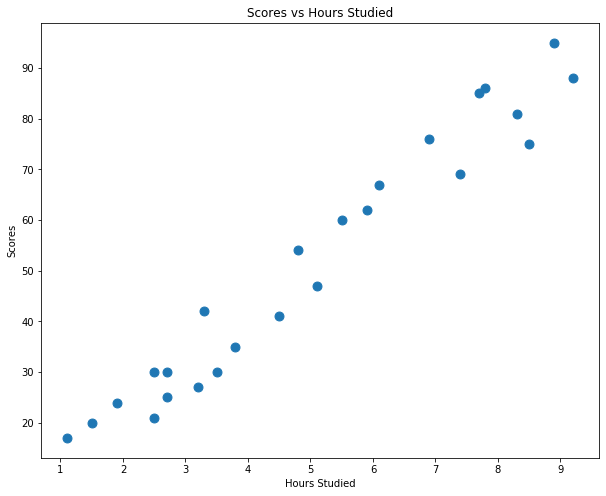

In [297]:
plt.figure(figsize=(10,8))
plt.scatter(x='Hours',y='Scores',data=df,s=80)
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Scores vs Hours Studied')


# Preparing Data for Train Test Split

In [298]:
X=df['Hours'].values
y=df['Scores'].values
X=X.reshape(-1,1)
#y=y.reshape(-1,1)


# Building the Model

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [300]:
#Here, we split the data - 70% into training set and remaining 30% into testing set.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [301]:
#Fitting the Algorithm on Train Set
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [302]:
#Making Predictions on unseen data(Test set)
pred=lr.predict(X_test)
print(pred)

[28.4491773  86.79161393 67.97147308 76.44053646 17.15709279 58.56140265
 89.61463506 81.14557167]


In [303]:
#Calculating Intercept
print(lr.intercept_)

3.041987148281585


In [304]:
#Calculating Coefficient
print(lr.coef_)

[9.41007042]


In [305]:
#Comparing Actual vs Predicted
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df_pred

,Actual,Predicted
0,30,28.449177
1,95,86.791614
2,76,67.971473
3,86,76.440536
4,20,17.157093
5,62,58.561403
6,88,89.614635
7,81,81.145572


# Plotting the regression line

In [306]:
#Regression Line
line = lr.coef_* X+ lr.intercept_

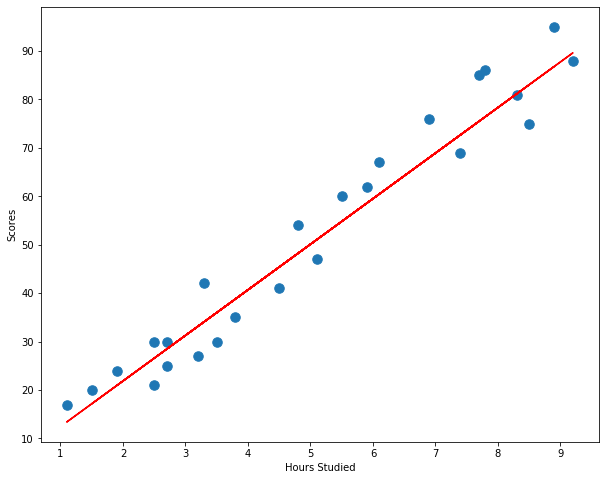

In [307]:
plt.figure(figsize=(10,8))
plt.scatter(x=X,y=y,s=90)
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.plot(X,line,c='Red')


# Making Predictions

In [308]:
hours=[[9.25]]
pred_h=lr.predict(hours)

In [309]:
print('Hours:',hours[0][0])
print('Predicted Score:',pred_h[0])

Hours: 9.25
Predicted Score: 90.08513857787295


# Model Evaluation

In [310]:
from sklearn.metrics import mean_absolute_error , mean_squared_error,r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))

Mean Absolute Error: 4.4236138155973155


In [311]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)) )

Root Mean Squared Error: 5.569532646569384


In [312]:
print('r2 Score(%):',r2_score(y_test,pred)*100)

r2 Score(%): 95.45956360425181


The model gives 95.459% accuracy with Mean Absolute Error if 4.42.